# Regridding (interpolation)

The goal of this notebook is to demonstrate basic regridding to a specific scale (km) using interpolation and averaging of the variable (sea surface temperature).

### Description
This notebook uses multidimensional interpolation from the [xarray](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp.html) library. This approach is useful in that it allows the user to pass a custom grid. However, it is limited in the aggregation function can only return the *mean* of the variable, making it useful for data such as rate, temperature, and density, but not data such as population counts where the aggregate *sum* is desired.

## Setup

First run:

```
wget https://jataware-world-modelers.s3.amazonaws.com/analytic-layers/sample_2.nc
```


### Requirements
```
matplotlib==3.4.2
netCDF4==1.5.7
numpy==1.20.3
xarray==0.18.2

```

In [1]:
%matplotlib inline

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
def getScale(lat0, lon0, lat1, lon1):
    '''
    Description
    -----------
    Return an estimation of the scale in km of a netcdf dataset.
    The estimate is based on the first two data points, and returns 
    the scale distance at that lat/lon.
    
    '''
    r = 6371 # Radius of the earth in km
    dLat = np.radians(lat1 - lat0)
    dLon = np.radians(lon1 - lon0) 
    
    a =  math.sin(dLat/2) * math.sin(dLat/2) \
        + math.cos(np.radians(lat0)) * math.cos(np.radians(lat1)) \
        * math.sin(dLon/2) * math.sin(dLon/2)
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a)); 
    d = r * c; # Distance in km
    return d

### Load and examine the netCDF datset using xarray.

In [6]:
ds = xr.open_dataset('sample_2.nc', engine='netcdf4')

### What is the scale (km) of the dataset?

In [7]:
ds_scale = getScale(ds.lat[0], ds.lon[0], ds.lat[1], ds.lon[1])
ds_scale

119.00043640678835

### For example, if we have a specific use case where we need to increase the scale to 500 km to reduce the size of the dataset, calculate the multiplier for the regridding.

In [8]:
multiplier = ds_scale / 500
multiplier

0.2380008728135767

### Generate new lat and lon arrays at that resoluton.

In [9]:
new_lon = np.linspace(ds.lon[0], ds.lon[-1], round(ds.dims["lon"] * multiplier))
new_lat = np.linspace(ds.lat[0], ds.lat[-1], round(ds.dims["lat"] * multiplier))

### Regrid the dataset to the new scale.

In [10]:
ds2 = ds.interp(lat=new_lat, lon=new_lon)

### Plot the first time coordinate of the regridded dataset (ds2).

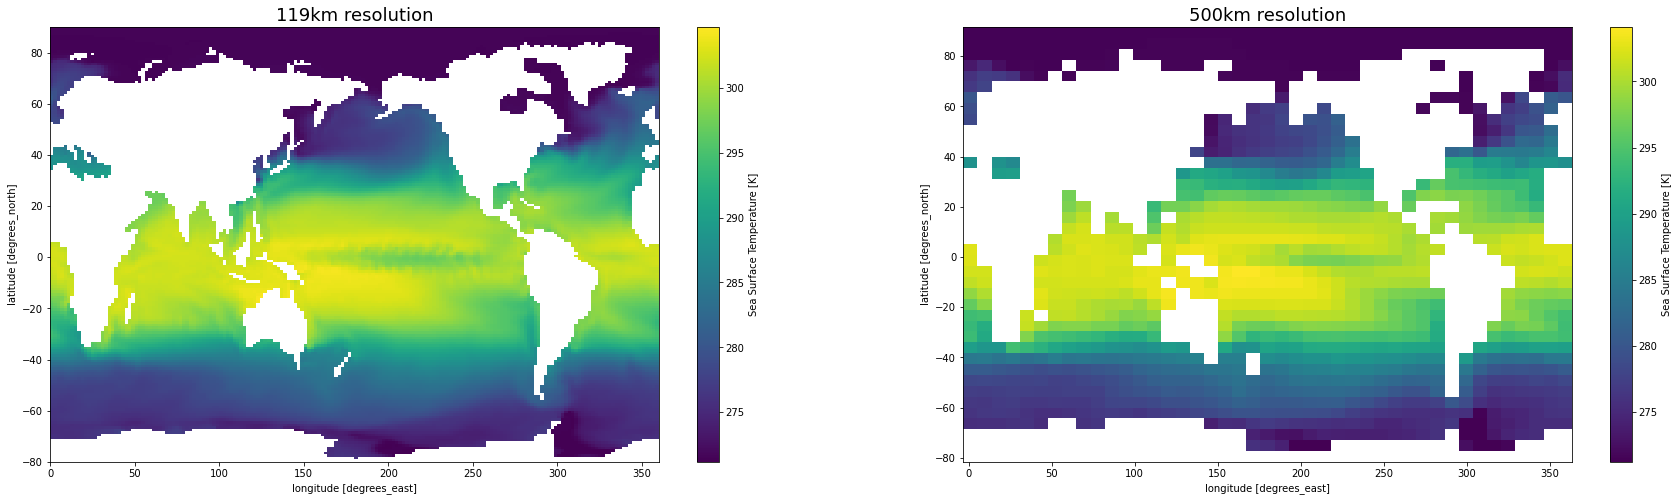

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(30, 8))

ds.tos[0,:,:].plot(ax=axes[0])
axes[0].set_title("119km resolution", fontsize = 18)
ds2.tos[0,:,:].plot(ax=axes[1])
axes[1].set_title("500km resolution", fontsize = 18)
print()